<a href="https://colab.research.google.com/github/Alexander-Kahanek/Python/blob/master/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WelcomeWorld Happiness Analysis Report (2022–2024)
My name is Narendra Reddy Yadama, and I will be going through this dataset found on Kaggle, focusing on the years 2022 to 2024 [this dataset](https://www.kaggle.com/datasets/yadiraespinoza/world-happiness-2015-2024) found on kaggle, that will be modified for only the years 2022 to 2024.

I will be cleaning the data, I will go into detail on correlation and the R and R^2 values, aswell as looking at the regression plots for all the columns.

# Overview
In this report, I analyze the World Happiness dataset obtained from Kaggle. The original dataset spans from 2015 to 2024, but I have filtered and modified it to focus exclusively on the years 2022 to 2024. This study aims to assess the happiness levels of over 140 countries using several key indicators and advanced statistical methods.

# Dataset Description
This modified dataset ranks countries based on their happiness levels, which are determined through the following indicators:

* Economic Production (GDP per capita): Measures the impact of a country's economic output on happiness.

* Social Support (Family): Reflects the degree to which familial and social networks contribute to well-being.

* Life Expectancy (Health): Indicates the contribution of overall health and longevity to happiness.

* Freedom: Captures the extent of personal freedom, including freedom of speech and the ability to pursue one’s goals.

* Absence of Corruption (Trust): Represents how government corruption affects overall trust and happiness.

* Generosity: Assesses the role of altruism and community support in the happiness score.

* Dystopia Residual:
 * Definition: This is calculated as the sum of a base Dystopia Happiness Score (1.85) and the residual (or unexplained) value for each country.

  * Purpose: Dystopia, a fictional country representing the world’s lowest happiness levels, serves as a benchmark.

     * Lower Dystopia Residual indicates a lower level of happiness.

    * Higher Dystopia Residual suggests a higher level of happiness.

##Key Columns in the Dataset:

* Country: Name of the country.

* Happiness Rank: Ranking of the country based on its happiness score.

* Happiness Score: A composite metric (scaled from 1 to 10) reflecting overall happiness, obtained from survey responses.

* Economic (GDP per capita)

* Family (Social Support)

* Health (Life Expectancy)

* Freedom

* Trust (Government Corruption)

* Generosity

* Dystopia Residual

* Year

Note: The overall Happiness Score is determined by summing the contributions from all the above factors:

  Happiness Score = Economic + Family + Health + Freedom + Trust + Generosity + Dystopia Residual

# Analytical Approach
In this report, I will be performing the following analyses:

###1. Data Cleaning:

* Ensuring the dataset contains only the records from 2022 to 2024.

* Handling missing or inconsistent data values to improve accuracy.

###2. Correlation Analysis:

* Investigating the relationships between the various indicators and the overall happiness score.

* Calculating the correlation coefficient (R) to measure the strength and direction of these relationships.

* Determining the coefficient of determination (R²) to understand the proportion of variance in the happiness score that is explained by each indicator.

###3. Regression Analysis and Visualization:

* Constructing regression models for each predictor variable to explore how they influence the happiness score.

* Creating regression plots for all the columns to visually assess the trends and relationships.

# Let's Get Started!
This report will detail the insights drawn from the dataset and the statistical methods used to uncover the dynamics of happiness across different countries. I look forward to sharing the findings and engaging in a deeper exploration of what factors most significantly impact global happiness.

Feel free to let me know if you need further updates or additional sections in the report!



## Do note:
# *HappinessScore = Economic(GDPpercap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual*



In [127]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
from google.colab import files
import io

uploaded = files.upload() #import 2022, 2023, 2024 files

In [129]:
#reading in all three files
import pandas as pd

# If semicolon-delimited
raw_2022 = pd.read_csv('world_happiness_2022.csv', sep=';')
raw_2023 = pd.read_csv('world_happiness_2023.csv', sep=';')
raw_2024 = pd.read_csv('world_happiness_2024.csv', sep=';')

#lets check each head
raw_2024.head(2) #2022 head

,Ranking,Country,Regional indicator,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,140,Afghanistan,South Asia,"1,721","2,93451",0,62,0,"0,22638","0,15383"
1,86,Albania,Central and Eastern Europe,"5,3042","6,71748","0,57133",74,"0,79892","0,34403","0,08517"


In [130]:
raw_2022.head(2) #2022 head

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,146,Afghanistan,South Asia,"2,4038","3,43077",0,65,0,"0,18993","0,00832"
1,90,Albania,Central and Eastern Europe,"5,1988","6,51098","0,48923",78,"0,69039","0,29574","0,04836"


In [131]:
raw_2023.head(2) #2023 head

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,"7,8042","8,58486","0,97853",71.0,1,"0,29969","0,04551"
1,2,Denmark,Western Europe,"7,5864","8,86229","0,95567",71.0,"0,95192","0,49451","0,06348"


In [132]:
raw_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       145 non-null    int64 
 1   Country                       145 non-null    object
 2   Regional indicator            145 non-null    object
 3   Happiness score               145 non-null    object
 4   GDP per capita                145 non-null    object
 5   Social support                145 non-null    object
 6   Healthy life expectancy       145 non-null    int64 
 7   Freedom to make life choices  145 non-null    object
 8   Generosity                    145 non-null    object
 9   Perceptions of corruption     145 non-null    object
dtypes: int64(2), object(8)
memory usage: 11.5+ KB


# Things we need to fix with the data
* 2024 has different header names.
* 2022 and 2024 have a region attached, giving it one extra column.

There will be other things to check, but I want to fix these first.


## Fixing 2022 and 2024 columns

In [133]:
# Define the standardized column names we want to keep
correct_columns = [
    'Country',
    'Happiness Rank',
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)'
]

# Function to rename columns and select only the desired ones
def rename_and_select_columns(df):
    df = df.rename(columns={
        'Ranking': 'Happiness Rank',
        'Happiness score': 'Happiness Score',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Social support': 'Family',
        'Healthy life expectancy': 'Health (Life Expectancy)',
        'Freedom to make life choices': 'Freedom',
        'Perceptions of corruption': 'Trust (Government Corruption)'
    })
    return df[correct_columns]

# Display the first few rows of each DataFrame for verification
print("2022 Data:")
display(raw_2022.head())

print("2023 Data:")
display(raw_2023.head())

print("2024 Data:")
display(raw_2024.head())


2022 Data:


,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,146,Afghanistan,South Asia,"2,4038","3,43077",0,65,0,"0,18993","0,00832"
1,90,Albania,Central and Eastern Europe,"5,1988","6,51098","0,48923",78,"0,69039","0,29574","0,04836"
2,96,Argelia,Sub-Saharan Africa,"5,1223","6,16812","0,73461",76,"0,19727","0,22752","0,25535"
3,57,Argentina,Latin America and Caribbean,"5,967","7,20403","0,83488",76,"0,75047","0,17207","0,14472"
4,82,Armenia,Commonwealth of Independent States,"5,3986","6,49102","0,62118",76,"0,75348","0,11645","0,35769"


2023 Data:


,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,"7,8042","8,58486","0,97853",71.0,1,"0,29969","0,04551"
1,2,Denmark,Western Europe,"7,5864","8,86229","0,95567",71.0,"0,95192","0,49451","0,06348"
2,3,Iceland,Western Europe,"7,5296","8,75364",1,72.0,"0,95678","0,59219","0,66635"
3,4,Israel,Middle East and North Africa,"7,4729","8,3349","0,93888",73.0,"0,73689","0,29427","0,71775"
4,5,Netherlands,Western Europe,"7,403","8,82986","0,91885",72.0,"0,87144","0,59435","0,29735"


2024 Data:


,Ranking,Country,Regional indicator,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,140,Afghanistan,South Asia,"1,721","2,93451",0,62,0,"0,22638","0,15383"
1,86,Albania,Central and Eastern Europe,"5,3042","6,71748","0,57133",74,"0,79892","0,34403","0,08517"
2,84,Argelia,Sub-Saharan Africa,"5,3635","6,18327","0,73652",72,"0,28611","0,22771","0,34775"
3,48,Argentina,Latin America and Caribbean,"6,1881","7,29612","0,85449",73,"0,78851","0,21822","0,1399"
4,81,Armenia,Commonwealth of Independent States,"5,4549","6,7441","0,71415",73,"0,75317","0,12831","0,3009"


## Fixing 2024 data

The trust and generosity columns were swapped in our data, so we can go ahead and swap them back to match our 2022 and 2023 set.

In [134]:
# ---------------------------
# Process raw_2024 first:
# ---------------------------

# Define the desired column order for raw_2024 (from your previous instructions)
temp_col = [
    'Country',
    'Happiness.Rank',
    'Happiness.Score',
    'Economy..GDP.per.Capita.',
    'Family',
    'Health..Life.Expectancy.',
    'Freedom',
    'Trust..Government.Corruption.',
    'Generosity',
    'Dystopia.Residual'
]

# Clean raw_2024 column names (remove extra spaces)
raw_2024.columns = raw_2024.columns.str.strip()
print("raw_2024 columns BEFORE processing:")
print(raw_2024.columns.tolist())

# Define a mapping for renaming columns in raw_2024:
mapping_2024 = {
    'Ranking': 'Happiness.Rank',
    'Ladder score': 'Happiness.Score',  # Map "Ladder score" to "Happiness.Score"
    'GDP per capita': 'Economy..GDP.per.Capita.',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health..Life.Expectancy.',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust..Government.Corruption.'
    # "Generosity" remains unchanged.
}

# Rename raw_2024 columns using the mapping
raw_2024.rename(columns=mapping_2024, inplace=True)

# Drop unwanted columns (e.g., "Regional indicator" if it exists)
if 'Regional indicator' in raw_2024.columns:
    raw_2024 = raw_2024.drop(columns=['Regional indicator'])

# Add missing column "Dystopia.Residual" if not present
if 'Dystopia.Residual' not in raw_2024.columns:
    raw_2024['Dystopia.Residual'] = np.nan

# Now, ensure raw_2024 has all columns listed in temp_col.
for col in temp_col:
    if col not in raw_2024.columns:
        raw_2024[col] = np.nan

# Subset raw_2024 to only the desired columns (in the defined order)
raw_2024 = raw_2024[temp_col]

# ---------------------------
# Now, ensure raw_2022 (our standard) has the same columns as raw_2024:
# ---------------------------
# Check if raw_2022 is missing any columns that raw_2024 has.
missing_in_2022 = set(raw_2024.columns) - set(raw_2022.columns)
if missing_in_2022:
    print("Adding missing columns to raw_2022:", missing_in_2022)
    for col in missing_in_2022:
        raw_2022[col] = np.nan

# (Optional) If raw_2022 has extra columns, you might want to drop them:
raw_2022 = raw_2022[raw_2022.columns.intersection(raw_2024.columns)]

# Reorder raw_2022 to match raw_2024's column order
raw_2022 = raw_2022[raw_2024.columns]

# ---------------------------
# Finally, align raw_2024's column names with raw_2022's:
# ---------------------------
raw_2024.columns = raw_2022.columns

# ---------------------------
# Verification:
# ---------------------------
print("\nFinal column names for raw_2022:")
print(raw_2022.columns.tolist())
print("\nFinal column names for raw_2024:")
print(raw_2024.columns.tolist())

# Optional: display preview of raw_2024
display(raw_2024.head())


raw_2024 columns BEFORE processing:
['Ranking', 'Country', 'Regional indicator', 'Ladder score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Adding missing columns to raw_2022: {'Dystopia.Residual', 'Freedom', 'Happiness.Score', 'Health..Life.Expectancy.', 'Economy..GDP.per.Capita.', 'Happiness.Rank', 'Family', 'Trust..Government.Corruption.'}

Final column names for raw_2022:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']

Final column names for raw_2024:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']


,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
0,Afghanistan,140,"1,721","2,93451",0,62,0,"0,15383","0,22638",NaN
1,Albania,86,"5,3042","6,71748","0,57133",74,"0,79892","0,08517","0,34403",NaN
2,Argelia,84,"5,3635","6,18327","0,73652",72,"0,28611","0,34775","0,22771",NaN
3,Argentina,48,"6,1881","7,29612","0,85449",73,"0,78851","0,1399","0,21822",NaN
4,Armenia,81,"5,4549","6,7441","0,71415",73,"0,75317","0,3009","0,12831",NaN


Awesome, now all of our years match, lets load this all into one dataset now, first we should add a year column, so we can use this later on.

## Adding Year columns to data

In [135]:
# Add the Year column to each DataFrame
raw_2022['Year'] = 2022
raw_2023['Year'] = 2023
raw_2024['Year'] = 2024

## Joining data into one dataset

In [136]:
# Join the 2022, 2023, and 2024 DataFrames into one
join = [raw_2022, raw_2023, raw_2024]
data = pd.concat(join)

# Looking at total samples (non-null count per column)
print("Non-null counts for each column:")
print(data.count())


Non-null counts for each column:
Country                          422
Happiness.Rank                   140
Happiness.Score                  140
Economy..GDP.per.Capita.         140
Family                           140
Health..Life.Expectancy.         140
Freedom                          140
Trust..Government.Corruption.    140
Generosity                       422
Dystopia.Residual                  0
Year                             422
Ranking                          137
Regional indicator               137
Happiness score                  137
GDP per capita                   137
Social support                   137
Healthy life expectancy          136
Freedom to make life choices     137
Perceptions of corruption        137
dtype: int64


In [137]:
# Checking how many rows and columns we have
data.shape

(422, 19)

In [138]:
# Checking the data types of our data
data.dtypes

,0
Country,object
Happiness.Rank,float64
Happiness.Score,object
Economy..GDP.per.Capita.,object
Family,object
Health..Life.Expectancy.,float64
Freedom,object
Trust..Government.Corruption.,object
Generosity,object
Dystopia.Residual,float64


In [139]:
# Checking data for null values
data.isnull().sum()

,0
Country,0
Happiness.Rank,282
Happiness.Score,282
Economy..GDP.per.Capita.,282
Family,282
Health..Life.Expectancy.,282
Freedom,282
Trust..Government.Corruption.,282
Generosity,0
Dystopia.Residual,422


In [140]:
import pandas as pd
import numpy as np

# Define the factor columns of interest
factors = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]

# Identify which factor columns exist in your 'data' DataFrame
existing_factors = [col for col in factors if col in data.columns]
missing_factors = [col for col in factors if col not in data.columns]

if missing_factors:
    print("Warning: The following factor columns are missing and will be skipped:", missing_factors)

# Subset 'data' to only the columns that exist
data_w_cols = data[existing_factors]

# Now separate numeric columns from non-numeric
numeric_cols = data_w_cols.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = [col for col in existing_factors if col not in numeric_cols]

if non_numeric_cols:
    print("Warning: The following columns are non-numeric and will be excluded from comparison:", non_numeric_cols)

# Subset again to keep only numeric columns
data_w_cols_numeric = data_w_cols[numeric_cols]

# Count how many values are less than or equal to 0 in each numeric column
non_positive_counts = (data_w_cols_numeric <= 0).sum()
print("\nCount of non-positive (<= 0) values for each numeric factor column:")
print(non_positive_counts)

# Optional: check strictly negative values
# negative_counts = (data_w_cols_numeric < 0).sum()
# print("\nCount of strictly negative (< 0) values for each numeric factor column:")
# print(negative_counts)



Count of non-positive (<= 0) values for each numeric factor column:
Series([], dtype: float64)


If you unhide the second count, we can see that all these values are strictly 0

We have 3 values in each that are set to 0, out of 422 samples, this wont throw off our values too much, although let me make sure they are not all the same row.

In [142]:
# Step 1: Convert all factor columns to numeric
data_w_cols_numeric = data_w_cols.apply(pd.to_numeric, errors='coerce')

# Step 2: Check the columns' dtypes (optional, for debugging)
print("Data types after conversion to numeric:")
print(data_w_cols_numeric.dtypes)

# Step 3: Count total non-positive values using two approaches

# Approach 1: Direct total count using boolean summation
total_non_positive = (data_w_cols_numeric <= 0).sum().sum()
print("\nTotal number of non-positive (<= 0) values:", total_non_positive)

# Approach 2: Count per column, then sum
non_positive_by_column = (data_w_cols_numeric <= 0).sum()
print("\nNon-positive counts by column:")
print(non_positive_by_column)

total_non_positive_option2 = non_positive_by_column.sum()
print("\nTotal non-positive (<= 0) values across all factor columns:", total_non_positive_option2)


Data types after conversion to numeric:
Family        float64
Freedom       float64
Generosity    float64
dtype: object

Total number of non-positive (<= 0) values: 5

Non-positive counts by column:
Family        1
Freedom       1
Generosity    3
dtype: int64

Total non-positive (<= 0) values across all factor columns: 5


out of 18 values that are set to 0, it comes from only 8 rows. This means they are spread out enough not to mess with our data too much. As we are unsure if these values were too low to count, or not entered correctly. Alternatively, we could also replace these with the value of our mean for the column.

In [143]:
type(data)

pandas.core.frame.DataFrame

# Lets take a look at some scatter plots

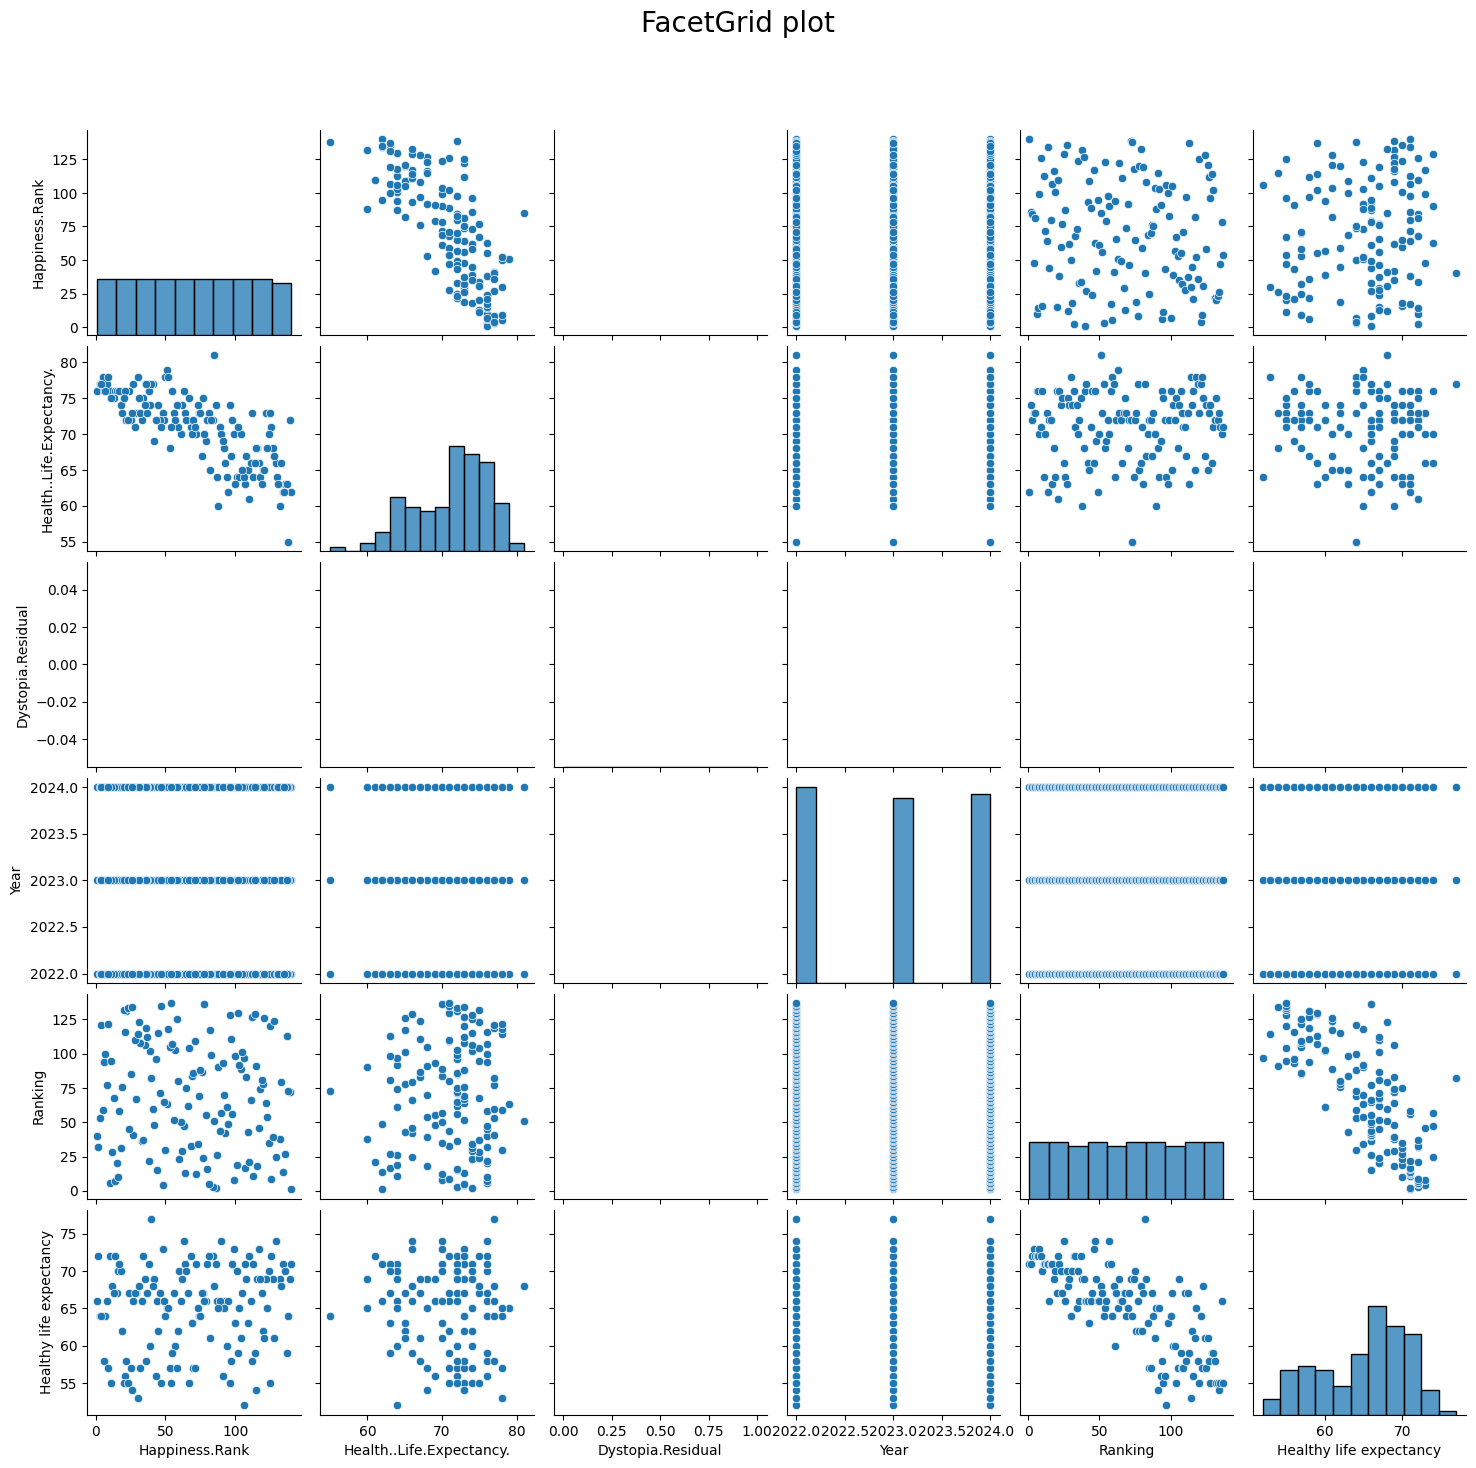

In [144]:
#pulling up a quick graph of plots for our data
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9)

# Taking a look at Pearsons R value

Next lets look at the correlation coefficient for our 8 factors.

Taking a look a these charts below, remember they are all "Happiness Score" vs the row name. This is why we get a r score of 1.0 when Happiness score is compared with itself.

Correlation coefficients with 'Happiness Score':
Happiness Score                  1.000000
Economy (GDP per Capita)         0.768501
Family                           0.813538
Health (Life Expectancy)         0.758750
Freedom                          0.644452
Trust (Government Corruption)    0.451722
Generosity                       0.129989
Dystopia Residual                     NaN
Name: Happiness Score, dtype: float64


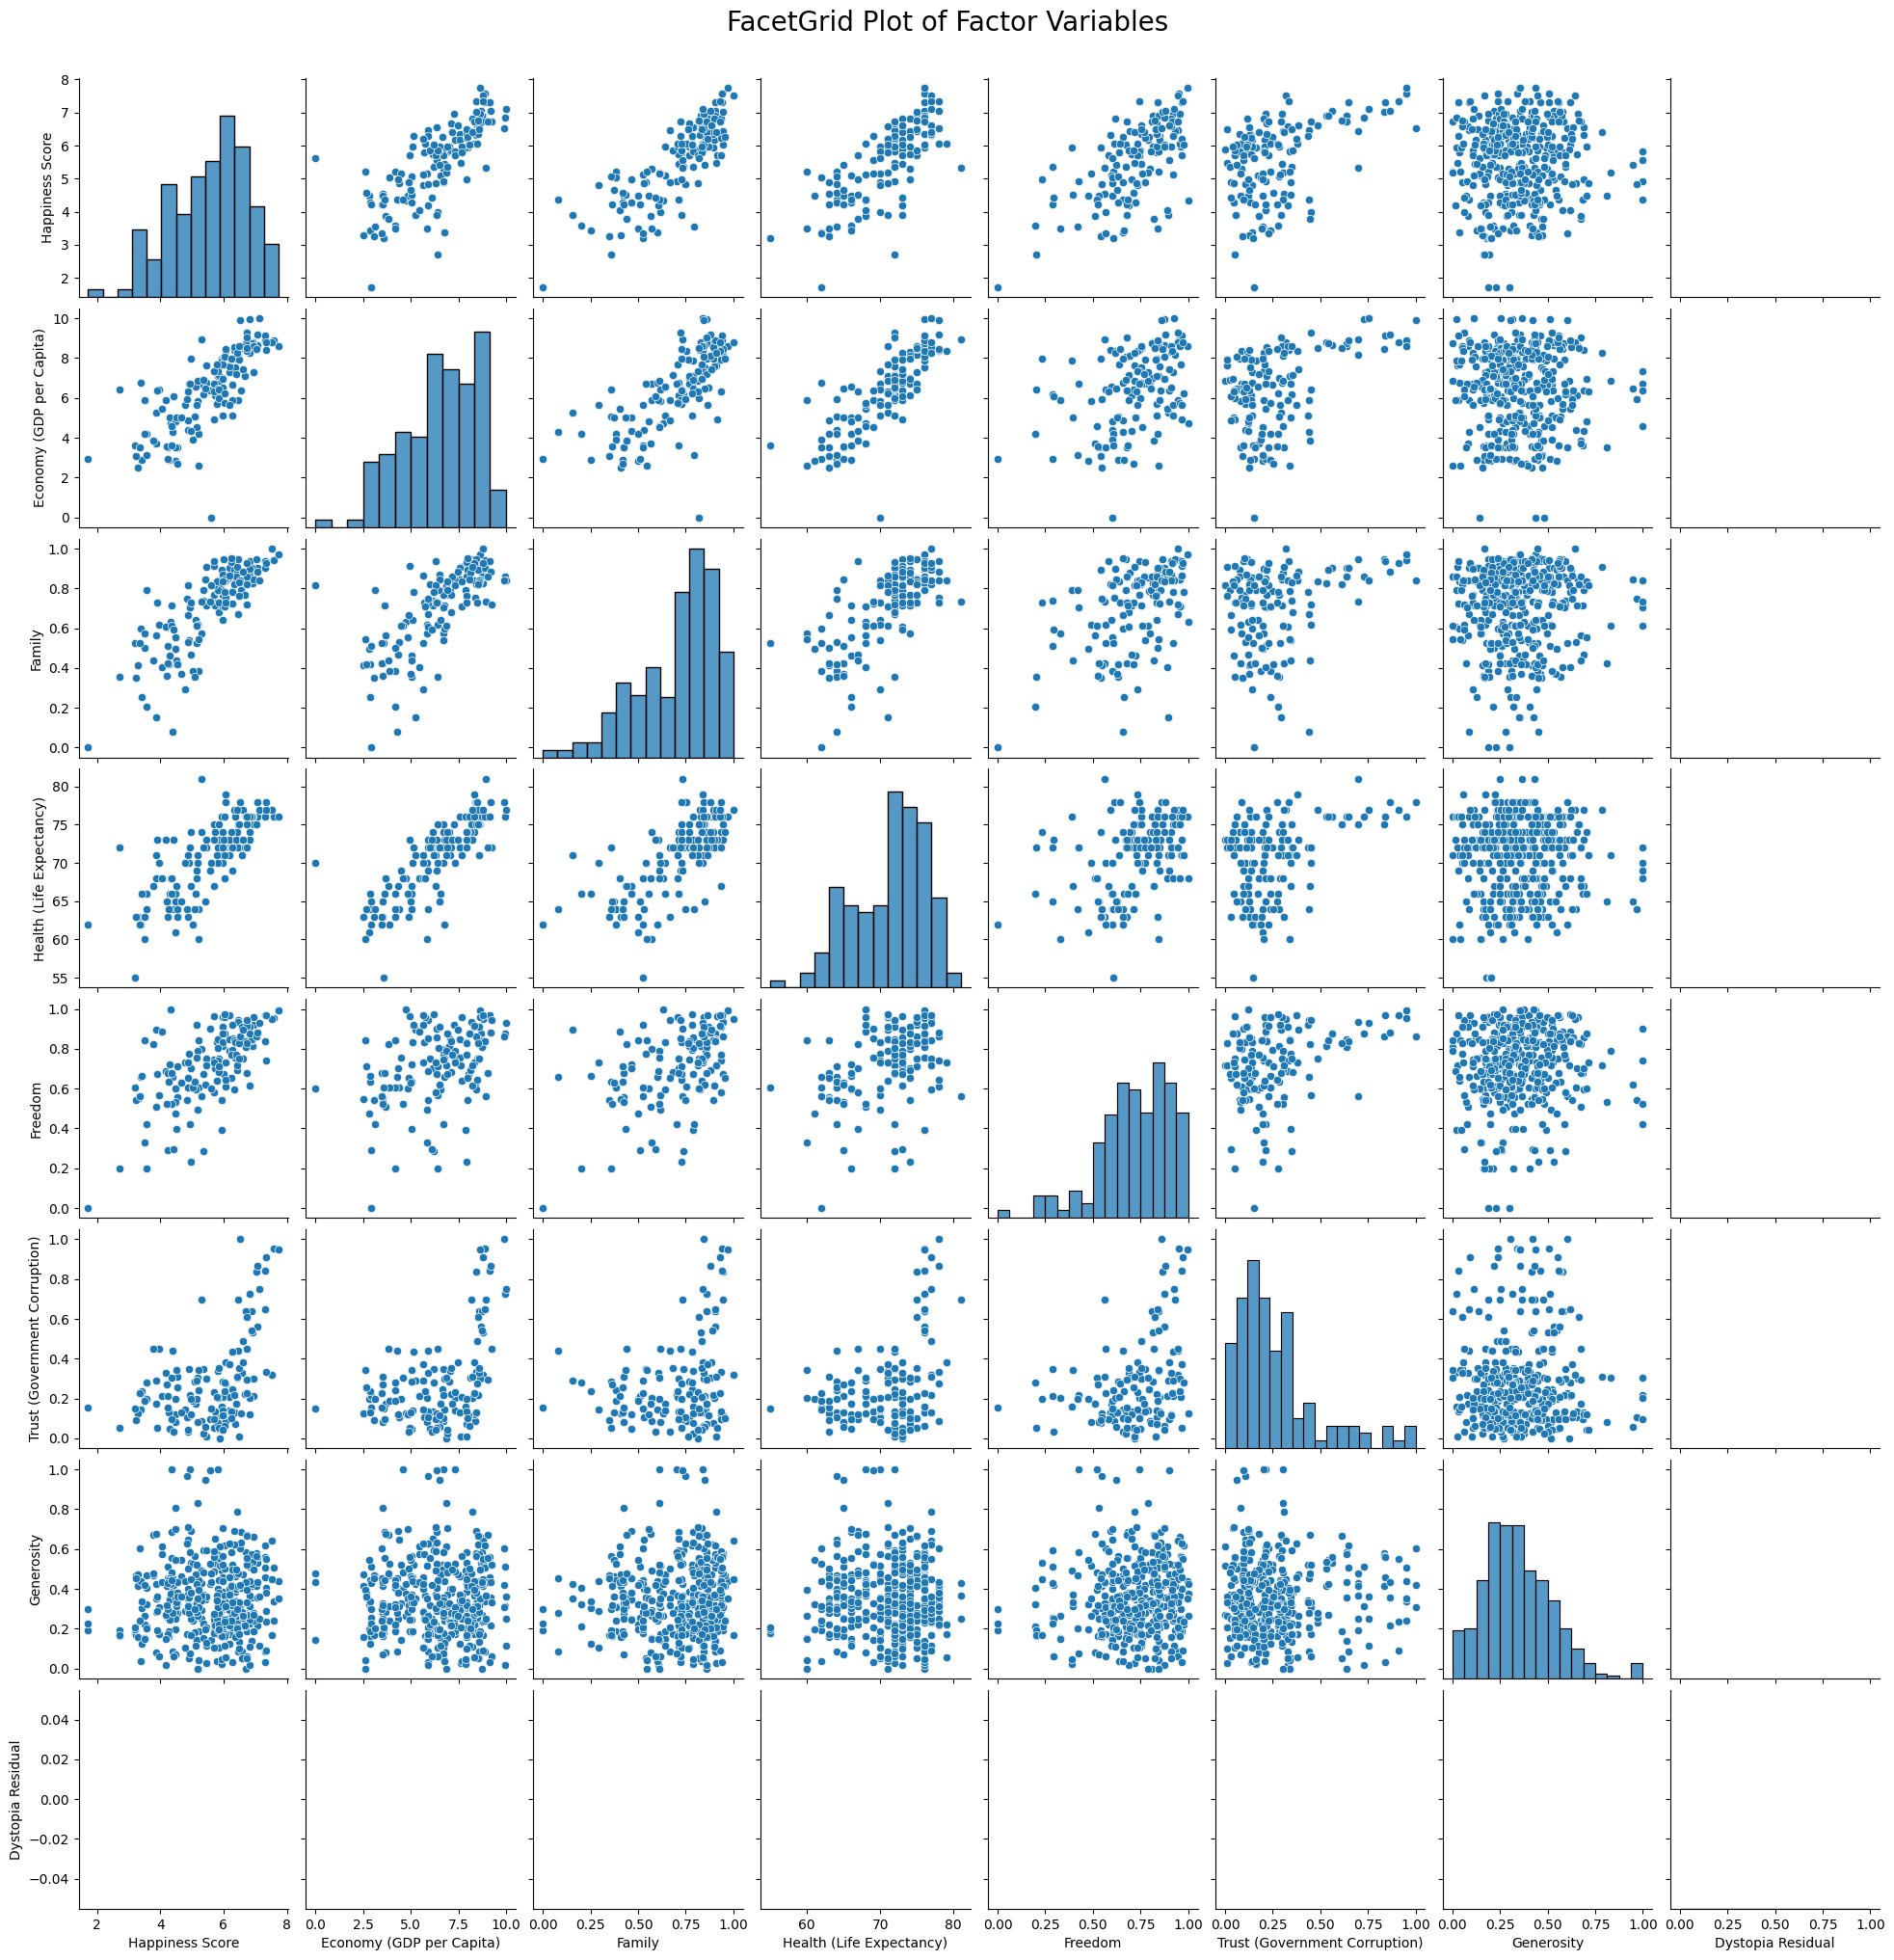

In [145]:
# --- Step 1: Rename Columns ---
# Assume 'data' is your merged DataFrame from 2022, 2023, and 2024.
# It might currently have columns like 'Happiness.Score', 'Economy..GDP.per.Capita.', etc.
# Create a dictionary mapping current column names to your desired column names.
rename_map = {
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
    # 'Family', 'Freedom', 'Generosity', and 'Country' remain the same.
}

# Rename columns in your DataFrame
data.rename(columns=rename_map, inplace=True)

# --- Step 2: Define the Factor Columns ---
# These are the columns you want to use in your correlation analysis.
factors = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]

# --- Step 3: Subset and Clean the Data ---
# Check that the desired factor columns exist in the DataFrame
existing_factors = [col for col in factors if col in data.columns]
missing_factors = [col for col in factors if col not in data.columns]

if missing_factors:
    print("Warning: The following factor columns are missing and will be skipped:", missing_factors)

# Subset the DataFrame to only the available factor columns
corr_data = data[existing_factors].copy()

# Replace any commas used as decimal separators with dots
corr_data = corr_data.replace(',', '.', regex=True)

# Convert all columns to numeric; non-numeric values will be set to NaN
corr_data = corr_data.apply(pd.to_numeric, errors='coerce')

# --- Step 4: Compute the Pearson Correlation Matrix ---
corr_matrix = corr_data.corr(method='pearson')

# --- Step 5: Extract and Print the Correlations with "Happiness Score" ---
if 'Happiness Score' in corr_matrix.columns:
    corr_with_happiness = corr_matrix['Happiness Score']
    print("Correlation coefficients with 'Happiness Score':")
    print(corr_with_happiness)
else:
    print("Error: 'Happiness Score' column is missing from the correlation matrix.")

# --- Optional: Visualize Relationships using Seaborn Pairplot ---
sns.pairplot(corr_data)
plt.suptitle('FacetGrid Plot of Factor Variables', fontsize=20, y=1.02)
plt.show()


Now we can see all the correlation coefficients for the rows vs Happiness Score.

Lets take a look at these values squared

## Pearsons R^2

In [146]:
#squaring our correlation coefficient
corr_data_sq = corr_data **2
corr_data_sq

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,NaN,NaN,NaN,NaN,NaN,NaN,0.036073,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.087462,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.051765,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.029608,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.013561,NaN
...,...,...,...,...,...,...,...,...
135,31.435085,0.000000,0.668143,4900.0,0.359880,0.022446,0.230102,NaN
136,36.517849,38.636045,0.614311,5041.0,0.952459,0.077384,0.054611,NaN
137,12.680721,9.834872,0.628421,4096.0,0.176182,0.038722,0.039952,NaN
138,12.266806,17.638152,0.250410,3969.0,0.709233,0.036146,0.174933,NaN


Now here is our Pearson Correlation coefficient Squared for all of our factors

## Heatmap of our R^2 values

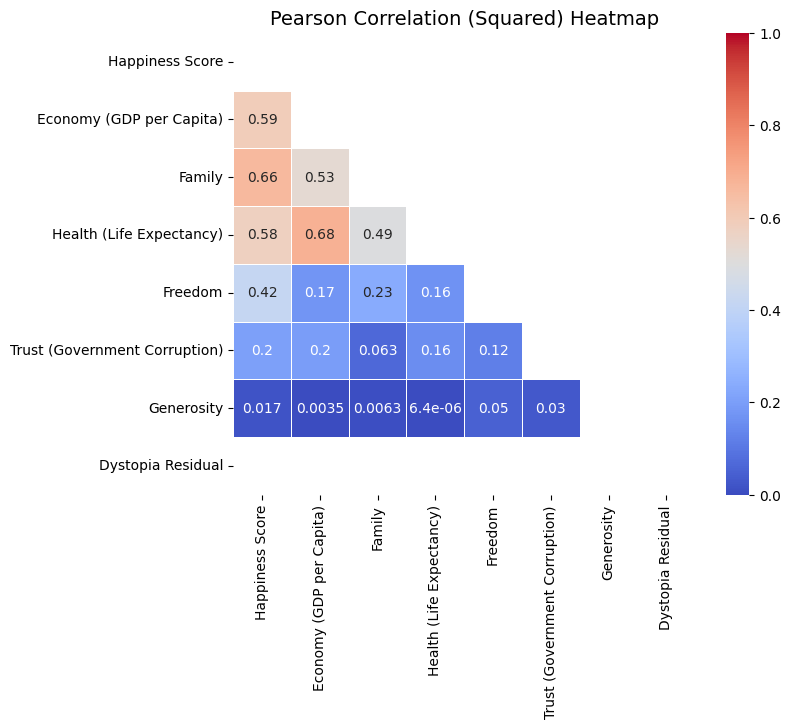

In [147]:
# 1. Define your factor columns
factors = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]

# 2. Subset the main DataFrame to only these factors
#    (If any factor columns are missing, handle accordingly.)
df_factors = data[factors].copy()

# 3. Replace commas with dots, then convert to numeric
df_factors = df_factors.replace(',', '.', regex=True)
df_factors = df_factors.apply(pd.to_numeric, errors='coerce')

# 4. Compute correlation matrix. If you need the squared correlations:
corr_matrix = df_factors.corr()        # normal correlation
corr_matrix_sq = corr_matrix ** 2      # correlation coefficients squared

# 5. Plot a triangular heatmap of the squared correlations
mask = np.triu(np.ones_like(corr_matrix_sq, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix_sq,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    vmax=1,
    vmin=0,
    square=True,
    linewidths=0.5
)
plt.title("Pearson Correlation (Squared) Heatmap", fontsize=14)
plt.show()


What we can gather from this:

When comparing a rows correlation with our Happiness Score, we can gather what the relation between its Happiness Score and the row are, or how well fit our line will be. A score close to 1 tells us the linear regression line is a better fit, while a score closer to 0, means its a worse fit.

It also seems like our Economy vs Family score fits the regression model moderately well at 0.53, as well as Economy vs Health at 0.68!

First lets make this easier to see as percents.

## R^2 as percents

In [148]:
# 1. Compute the Pearson correlation matrix
corr_matrix = corr_data.corr(method='pearson')

# 2. Extract correlations with 'Happiness Score'
corr_with_happiness = corr_matrix['Happiness Score']

# 3. Square the correlation coefficients to get R²
corr_data_sq = corr_with_happiness ** 2

# 4. Convert to percentages
corr_percent = corr_data_sq * 100

# 5. Print the result
print("Squared correlation (R²) * 100 with 'Happiness Score':")
print(corr_percent)


Squared correlation (R²) * 100 with 'Happiness Score':
Happiness Score                  100.000000
Economy (GDP per Capita)          59.059405
Family                            66.184480
Health (Life Expectancy)          57.570082
Freedom                           41.531798
Trust (Government Corruption)     20.405306
Generosity                         1.689715
Dystopia Residual                       NaN
Name: Happiness Score, dtype: float64


So now we can see that 59.1% of the Happiness Score seems to be effected by the Economy, where as only 4.6% of our Happiness Score is effected by the Generosity.

In short, Generosity and Trust seem to have little to do with the Happiness Scores reported. While the three biggest facors seem to be peoples' Economy, Family, and Health.

# Building scatterplots

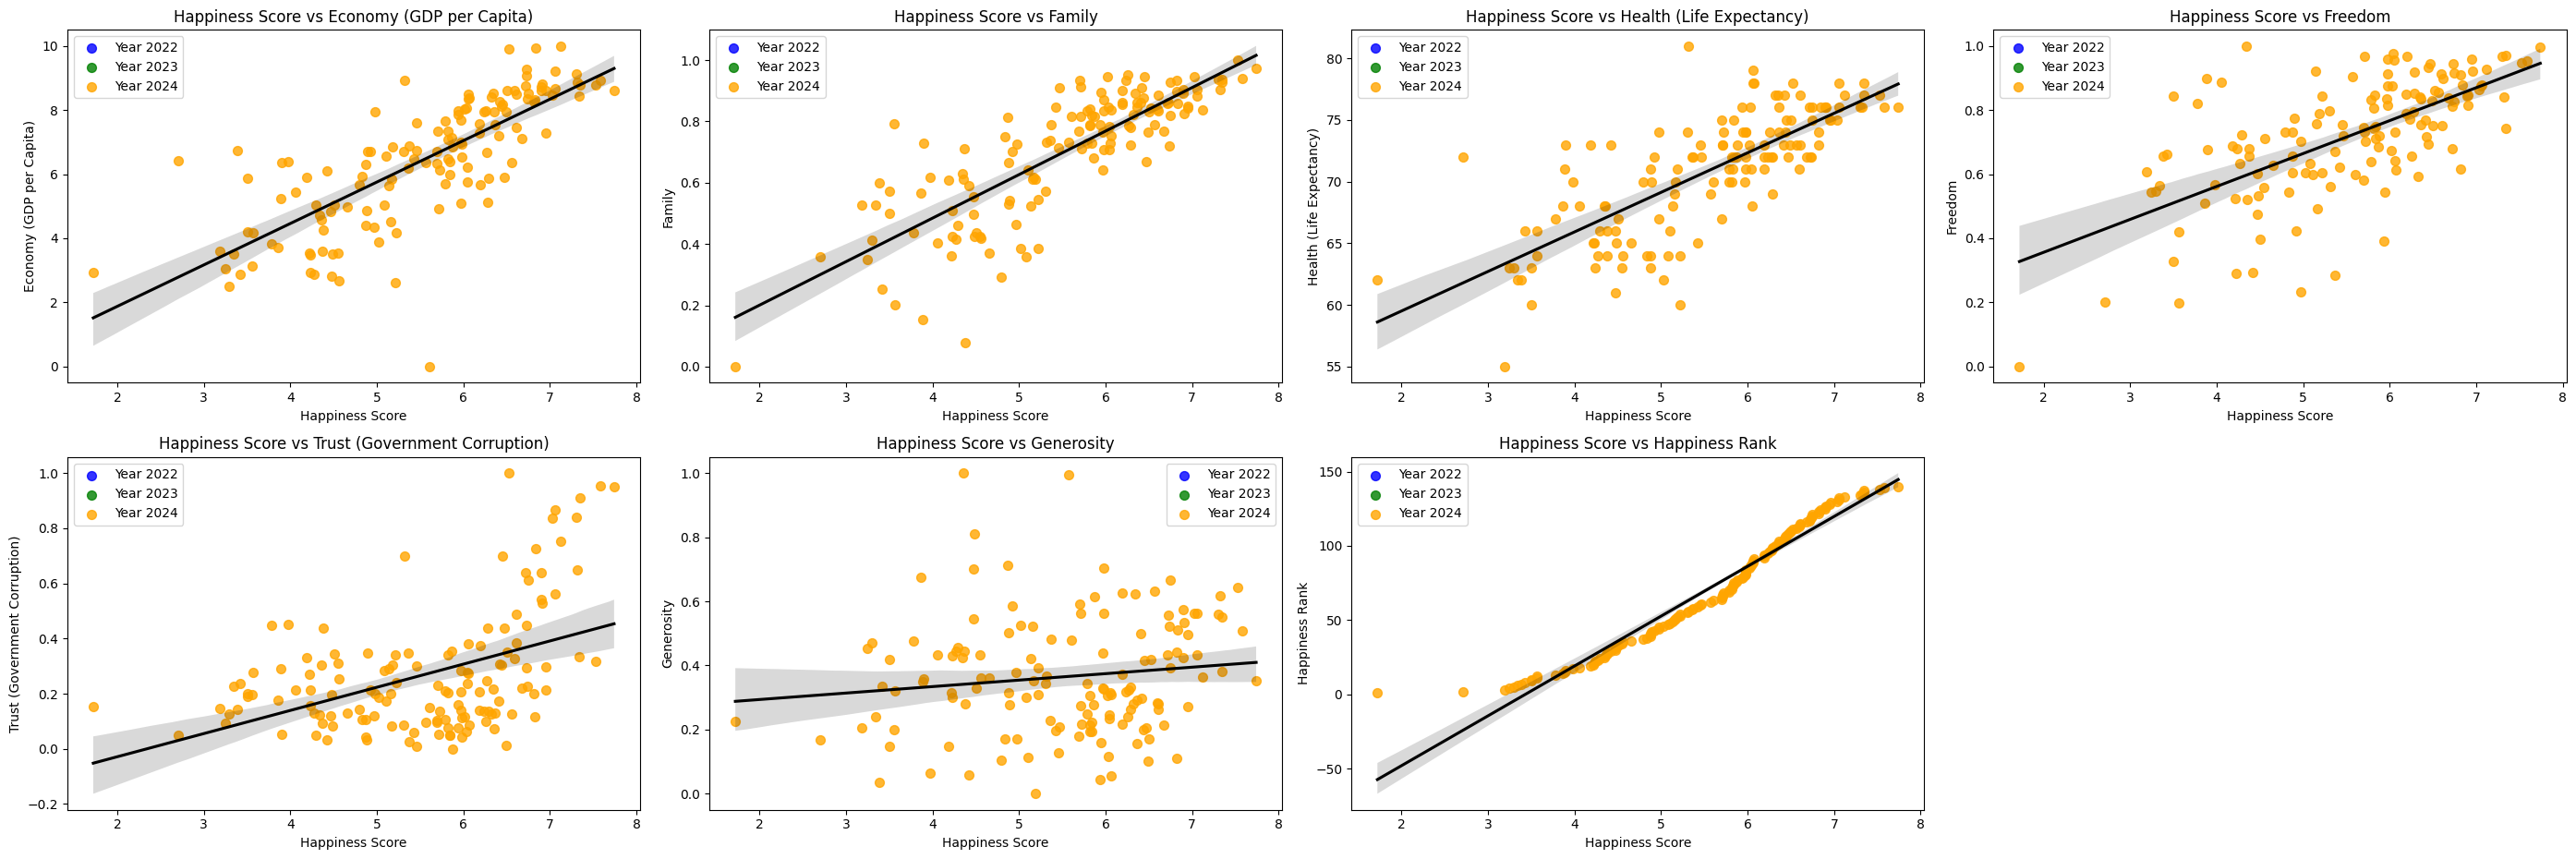

In [149]:
# ----------------------
# 1) Ensure Numeric Data
# ----------------------
all_factors = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual',
    'Happiness Rank'
]

# Convert columns to numeric
for col in all_factors:
    if col in data.columns:
        data[col] = data[col].replace(',', '.', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

# If "Happiness Rank" doesn't exist, create it
if 'Happiness Rank' not in data.columns:
    data['Happiness Rank'] = data['Happiness Score'].rank(method='min')

# ----------------------
# 2) Subset by Year
# ----------------------
data_22 = data[data['Year'] == 2022]
data_23 = data[data['Year'] == 2023]
data_24 = data[data['Year'] == 2024]

# Labels/colors
y_22, y_23, y_24 = "Year 2022", "Year 2023", "Year 2024"
year_colors = {2022: "blue", 2023: "green", 2024: "orange"}
factors_to_plot = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Happiness Rank'
]

# ----------------------
# 4) 2×4 Grid (Up to 8 Subplots)
# ----------------------
n_rows, n_cols = 2, 4
fig, ax = plt.subplots(n_rows, n_cols, squeeze=False)
fig.set_size_inches(7 * n_cols, 4.7 * n_rows)

# ----------------------
# 5) Plot Each Factor
# ----------------------
for i, factor in enumerate(factors_to_plot):
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax_idx = ax[row_idx][col_idx]

    # Plot each year's scatter
    sns.regplot(
        x=data_22['Happiness Score'],
        y=data_22[factor],
        fit_reg=False,
        label=y_22,
        ax=ax_idx,
        scatter_kws={'color': year_colors[2022], 's': 50}
    )

    sns.regplot(
        x=data_23['Happiness Score'],
        y=data_23[factor],
        fit_reg=False,
        label=y_23,
        ax=ax_idx,
        scatter_kws={'color': year_colors[2023], 's': 50}
    )

    sns.regplot(
        x=data_24['Happiness Score'],
        y=data_24[factor],
        fit_reg=False,
        label=y_24,
        ax=ax_idx,
        scatter_kws={'color': year_colors[2024], 's': 50}
    )

    # Overall regression line (all years) in black
    sns.regplot(
        x=data['Happiness Score'],
        y=data[factor],
        scatter=False,
        color='black',
        ax=ax_idx
    )

    ax_idx.set_title(f"Happiness Score vs {factor}")
    ax_idx.legend(loc='best')

# ----------------------
# 6) Remove Extra Subplots
# ----------------------
n_plots = len(factors_to_plot)  # 7 in this example
total_subplots = n_rows * n_cols  # 8 in a 2×4 grid
if n_plots < total_subplots:
    for j in range(n_plots, total_subplots):
        fig.delaxes(ax[j // n_cols][j % n_cols])

plt.tight_layout()
plt.show()


As expected with our linear regression lines, there are good fits for the Economy, Family, and Health graphs, while theres a moderately good fit for the Dystopia and Freedom graphs, and a poor fit for the Generosity and Trust graphs.

With the color differences, we can see the Family scores tend to be lower in 2023 and the Dystopia Residual scores seem to be higher in 2023. While everything else tends to stay relatively the same throughout the 3 years.

# Splitting the 2023 data out of our scatter plot

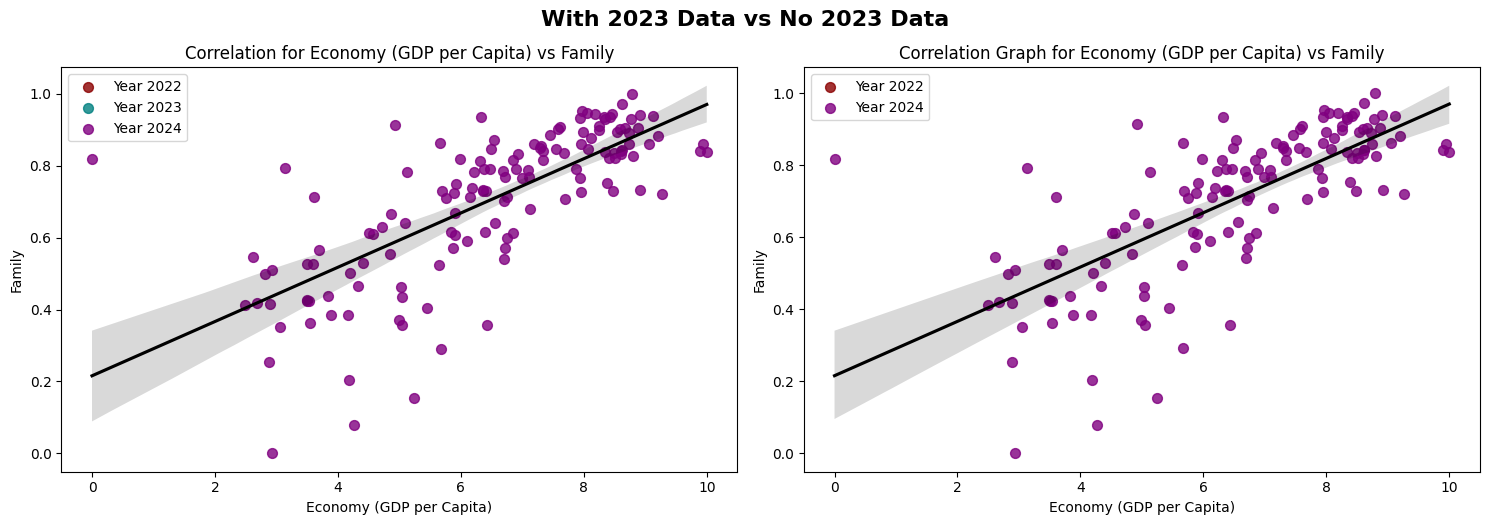

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----- Define Boolean Masks for Years 2022, 2023, 2024 -----
yr_2022 = data['Year'] == 2022
yr_2023 = data['Year'] == 2023
yr_2024 = data['Year'] == 2024

# ----- Create Subsets for Each Year -----
data_22 = data[yr_2022]
data_23 = data[yr_2023]
data_24 = data[yr_2024]

# Create a subset containing only 2022 and 2024 data (for the right subplot)
data_22_24 = data[yr_2022 | yr_2024]

# ----- Define Different Colors for Each Year -----
# Feel free to modify these colors as desired.
year_colors = {
    2022: "darkred",   # Color for 2022
    2023: "teal",      # Color for 2023
    2024: "purple"     # Color for 2024
}

# ----- Set Up the Figure and Axes (1 row, 2 columns) -----
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.text(0.5, 1.0, "With 2023 Data vs No 2023 Data", fontsize=16, weight='bold', ha='center', va='bottom')

# ----- LEFT SUBPLOT: With 2023 Data (2022, 2023, 2024) -----
# Plot 2022 data
sns.regplot(
    x=data_22['Economy (GDP per Capita)'],
    y=data_22['Family'],
    fit_reg=False,
    label="Year 2022",
    ax=ax[0],
    color=year_colors[2022],
    scatter_kws={'s': 50}
)
# Plot 2023 data
sns.regplot(
    x=data_23['Economy (GDP per Capita)'],
    y=data_23['Family'],
    fit_reg=False,
    label="Year 2023",
    ax=ax[0],
    color=year_colors[2023],
    scatter_kws={'s': 50}
)
# Plot 2024 data
sns.regplot(
    x=data_24['Economy (GDP per Capita)'],
    y=data_24['Family'],
    fit_reg=False,
    label="Year 2024",
    ax=ax[0],
    color=year_colors[2024],
    scatter_kws={'s': 50}
)
# Overall regression line using data for all three years in black
sns.regplot(
    x=data['Economy (GDP per Capita)'],
    y=data['Family'],
    scatter=False,
    color='black',
    ax=ax[0]
)
ax[0].set_title("Correlation for Economy (GDP per Capita) vs Family")
ax[0].legend(loc='best')

# ----- RIGHT SUBPLOT: No 2023 Data (Only 2022 & 2024) -----
# Plot 2022 data
sns.regplot(
    x=data_22['Economy (GDP per Capita)'],
    y=data_22['Family'],
    fit_reg=False,
    label="Year 2022",
    ax=ax[1],
    color=year_colors[2022],
    scatter_kws={'s': 50}
)
# Plot 2024 data
sns.regplot(
    x=data_24['Economy (GDP per Capita)'],
    y=data_24['Family'],
    fit_reg=False,
    label="Year 2024",
    ax=ax[1],
    color=year_colors[2024],
    scatter_kws={'s': 50}
)
# Overall regression line using only 2022 & 2024 data in black
sns.regplot(
    x=data_22_24['Economy (GDP per Capita)'],
    y=data_22_24['Family'],
    scatter=False,
    color='black',
    ax=ax[1]
)
ax[1].set_title("Correlation Graph for Economy (GDP per Capita) vs Family")
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()


Taking a look at the 2023 data included graph for the Economy scores vs Family scores, we can see that our regression line fits moderately well, which was shown by our previous heatmap. We can also notice again, that our family scores tend to be lower, which we determined from our previous graphs.

Looking at the graph without the 2023 data, we can see a marginally better fit. Lets get a better look at these fits by finding the r squared values.

## Evaluation of R^2 values for Family vs Row


In [151]:
#using data for strictly year 2022 and year 2024
data_22_24_corr = data_22_24[factors]

#getting the correlation coefficient, then squaring the numbers
data_22_24_corr = data_22_24_corr.corr() **2
data_22_24_corr['Family']

,Family
Happiness Score,0.661845
Economy (GDP per Capita),0.528213
Family,1.000000
Health (Life Expectancy),0.493973
Freedom,0.234964
Trust (Government Corruption),0.063005
Generosity,0.006348
Dystopia Residual,NaN


This chart is using the data without 2023, read as Family vs Row, this is why we have 1.0 in Family vs Family.

As we can see our squared correlation coefficients between Family and Economy from 0.53 to 0.55, showing over a 2% increase in our data fitting better, after removing our 2023 data.

We can also notice our Family score vs Happiness score jumped from 0.66 to 0.67, a small increase without our 2023 data.

There was one more correlation that seemed to fit very well, from the heatmap earlier, Economy vs Health.

# Checking Economy vs Health correlation

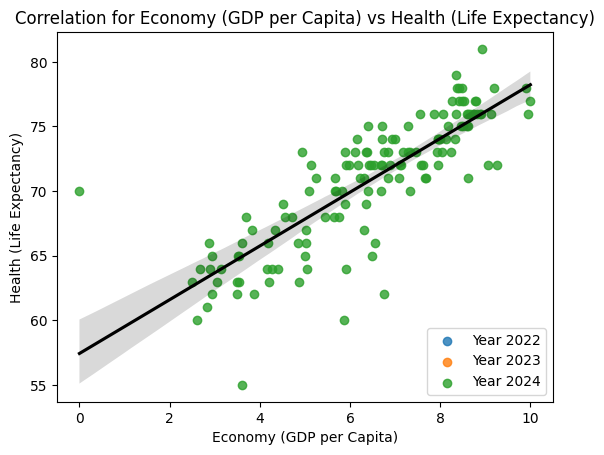

In [152]:
l = sns.regplot(data = data, x=data_22['Economy (GDP per Capita)'], y= data_22['Health (Life Expectancy)'], fit_reg=False, label = y_a[0]) #cycle through 2022 data
sns.regplot(data = data, x=data_23['Economy (GDP per Capita)'], y= data_23['Health (Life Expectancy)'], fit_reg=False, label = y_a[1]) #layer ontop 2023 data
sns.regplot(data = data, x=data_24['Economy (GDP per Capita)'], y= data_24['Health (Life Expectancy)'], fit_reg=False, label = y_a[2]) #layer ontop 2024 data
#plot for regression line of total years
sns.regplot(data = data, x=data['Economy (GDP per Capita)'], y= data['Health (Life Expectancy)'], scatter= False, color = 'black').set_title("Correlation for Economy (GDP per Capita) vs Health (Life Expectancy)")
l.legend(loc=4)

The is graph of Economy vs Health has a heavy correlation of ~52%, the highest correlation out of all our categories.

#Summary
In general we can hypothesize that the biggest factors for someones happiness may be their Economy(59%), Health(57%), and Family(66%). We can also assume that Freedom(42%) and the Dystopia Residual(28%) have moderate correlation, while Trust(20%) and Generosity(2%) typically have the lowest correlation.

We can also notice that, in general, people in 2023 had a lower score for Family, which showed, when removing the lower 2023 data, a 14% increase (31% to 48%) in a correlation between Family and Economy, and a 3% increase (46% to 49%) in Family vs Happiness. This is something that is expected, as Happiness is more heavily correlated with three factors: Economy(59%), Health(57%), and Family(66%). Meanwhile the Economy is only heavily correlated with two factors: Health(62%) and Family(46%). Meaning the family scores will have a heavier impact on the economy score, as opposed to the happiness score, even though its correlation percentage is lower.